*PS: The cells in this document that have the output as an error only because we mistakenly re-runned them and cancelled the running right afterwars. By changing the directory and configuration to the machine it is being run, it will run with no problem.*

## **CHALLENGE:**
`In this project, it was employed YOLOv8 for image segmentation tasks on a dataset comprising 2,667 images. The dataset consisted of paired folders—one containing images to be segmented and the other containing corresponding masks. Leveraging the YOLOv8 model, it was performed segmentation, followed by binarization of the segmented outputs. The evaluation of segmentation accuracy was quantified using Intersection over Union (IoU) metrics, comparing the binarized predictions against the ground truth masks.`

 Dataset: Human Segmentation Dataset - Supervise.ly
    https://www.kaggle.com/datasets/tapakah68/supervisely-filtered-segmentation-person-dataset

# 1. Use Yolov8 model do get the segmentation of the images

In this section the goal is to get the segmentation of the images in the dataset and their respectives masks.
All the script in this section was developed firstly to a single image and then to all the images in the dataset.
The methods implemented in this section were based in some articles in the internet, including Yolov8 documentation Ultralyctics, some videos on YouTube, the feedback from the professor Tomas Brandão, and some help from ChatGPT for debugging.

## 1.1. Set up the environment

In [ ]:
#!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.229 🚀 Python-3.11.5 torch-2.1.2+cpu CPU (Intel Core(TM) i7-1065G7 1.30GHz)
Setup complete ✅ (8 CPUs, 15.7 GB RAM, 889.7/952.9 GB disk)


In [ ]:
#pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
from ultralytics import YOLO

# 2. Get the Segmentation of 1 image

The segmentation will first be done for one image. The image to test this part is the 'ds1_pexels-photo-61120.png'. 

In order to use Yolov8, the library should be installed and imported (from ultralytics import YOLO), and the pre-trained model for segmentation can then be used. Heres a reference on how to use it: https://docs.ultralytics.com/tasks/segment/#models

After adjusting the confidence threshold Yolov8 did a very good job doing the segmentation for this image. Below the parameters used:

    results = model(source=img_dir, show=False, conf=0.4, classes=0, show_boxes=False, save=True)

In our model function the most relevant arguments are:
- **source**: the name of the image or directory; * **(relevant)**
- show: wether or not to display the image;
- **conf**: confidence threshold for segmentation; (relevant) * **(relevant)**
- **classes=0**: 0 is the ID for the people's class. Since we want to use segment the people in our images, we should use that argument. * **(relevant)**
- show boxes: set to false because we didn't need the boxes for this segmentation work;
- save: set to false because there is no need to save in order to get the segmentation results.

Here is a resume of the available arguments and how to use them: https://docs.ultralytics.com/modes/predict/#inference-arguments

In [4]:
img_dir = 'C:\\Users\\dilanveracruz\\OneDrive - ISCTE-IUL\\APVC\\DesafioFinal_Yolov8\\Dataset\\images\\supervisely_person_clean_2667_img\\supervisely_person_clean_2667_img\\images\\ds1_pexels-photo-61120.png'

In the cell below only *masks = result.masks* is relevant for this project. But all the parameters where put only for exploration purposes.

In [5]:
# Load a model
model = YOLO('yolov8n-seg.pt')  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model(source=img_dir, show=False, conf=0.4, classes=0, show_boxes=False, save=False)  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    #print('boxes #######################',boxes)
    masks = result.masks  # Masks object for segmentation masks outputs
    #print('masks #######################',masks)
    keypoints = result.keypoints  # Keypoints object for pose outputs
    #print('keypoints #######################',keypoints)
    probs = result.probs  # Probs object for classification outputs
    #print('probs #######################',probs)


image 1/1 C:\Users\dilanveracruz\OneDrive - ISCTE-IUL\APVC\DesafioFinal_Yolov8\Dataset\images\supervisely_person_clean_2667_img\supervisely_person_clean_2667_img\images\ds1_pexels-photo-61120.png: 640x448 1 person, 191.0ms
Speed: 7.0ms preprocess, 191.0ms inference, 23.7ms postprocess per image at shape (1, 3, 640, 448)


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt') 
img_dir = 'C:\\Users\\dilanveracruz\\OneDrive - ISCTE-IUL\\APVC\\DesafioFinal_Yolov8\\Dataset\\images\\supervisely_person_clean_2667_img\\supervisely_person_clean_2667_img\\images\\ds1_pexels-photo-61120.png'

results = model(source=img_dir, show=True, conf=0.4, classes=0, show_boxes=False, save=False) 

Below is the original image and segmentation result of the image used.

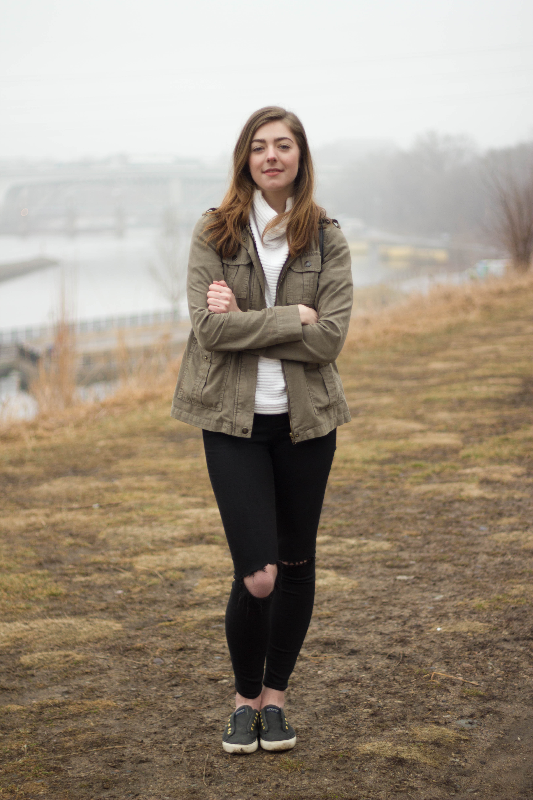

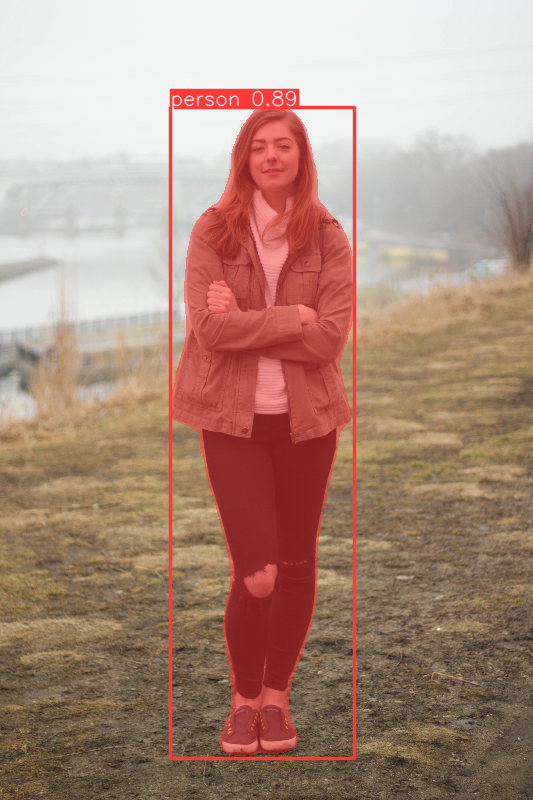

In [ ]:
from IPython.display import Image, display

listOfImageNames = ['ds1_pexels-photo-61120 (2).png','ds1_pexels-photo-61120.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

As it can be seen, Yolov8 did a very good job getting the segmentation of the image.

Although the above image segmentation was very good, Yolov8 did a not so good good segmenting some images. Some of them were indeed difficult to recognize the person in the image, even for us, humans, but others were not so much difficult. In overal the major influences on the model where:
- the colors in the image in relation to the overall color of the object (person, in this case)
- the position of the object (person) in the image
- how cropped the image was (and if the person was cut off the image

Below there is an example with one of the images in the dataset ***ds1_dawn-sunset-person-woman.png*** where Yolov8 failed to segment the person. For a human it is easy to get the area of the person in the image, but maybe because of the overall color of the image in relation to the human, YoloV8 failed to segment this image. 


Coincidencialy this image when segmented gives no output, meaning there is no segmentation result for this image. By using save=True in our model image, we expected Yolov8 to save a no-background-picture or to have the saved image all in black to the directory chosen, but Yolov8 just don't save the image if there is no sementation results.

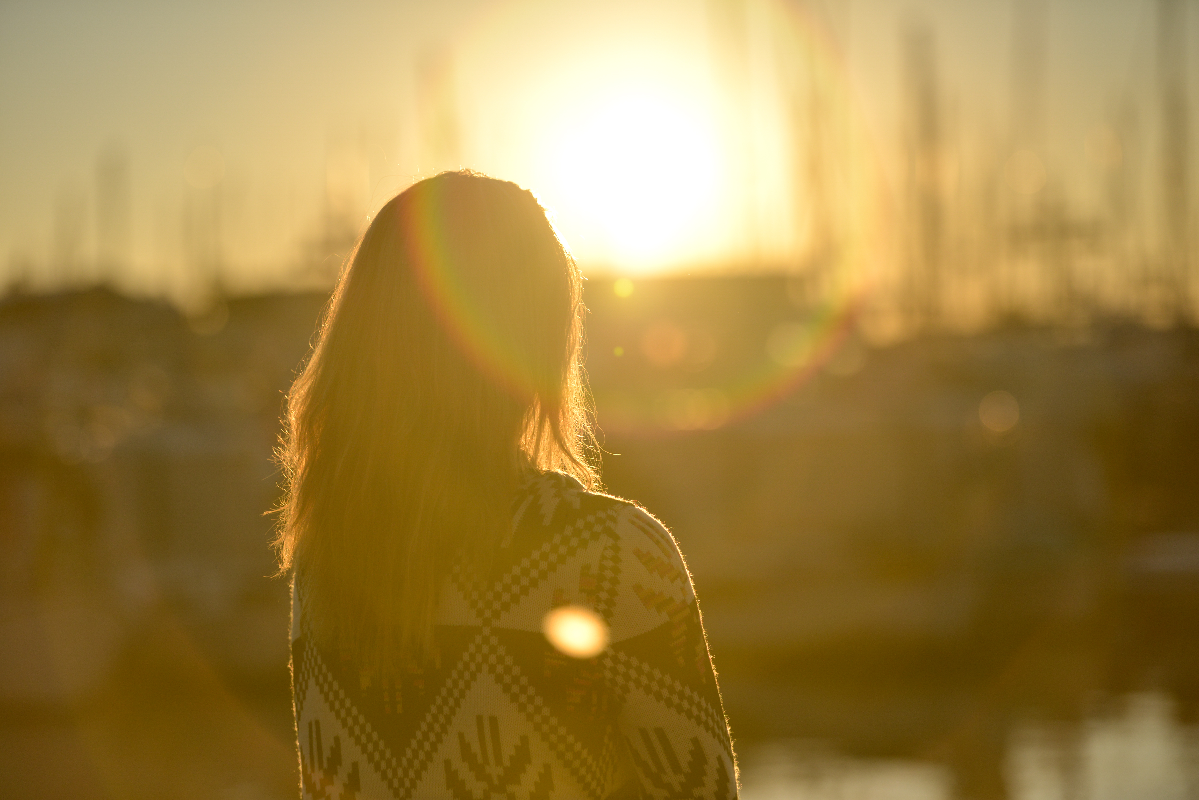

In [2]:
from IPython.display import Image, display

listOfImageNames = ['ds1_dawn-sunset-person-woman.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

# 3. Do the segmentation of a video (extra)

This section is not a requirement for this project but it was done just for the purpose of exploring more the model. 
Yolov8 did a very good job getting the segmentation of people in a video.

The video is provided in the zip file of this project.

In [3]:
# Run batched inference on video
results = model(source='Lisbon_walk.mp4', show=True, conf=0.4, classes=0, show_boxes=False, save=True)  # return a list of Results objects

# Close the video window
cv2.destroyAllWindows()
cv2.waitKey(0) 



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/3600) C:\Users\dilanveracruz\OneDrive - ISCTE-IUL\APVC\DesafioFinal_Yolov8\Script final\final_code\Lisbon_walk.mp4: 384x640 (no detections), 118.1ms
video 1/1 (2/3600) C:\Users\dilanveracruz\OneDrive - ISCTE-IUL\APVC\DesafioFinal_Yolov8\Script final\final_code\Lisbon_walk.mp4: 384x640 (no detections), 111.3ms
video 1/1 (3/3600) C:\Users\dilanveracruz\OneDrive - ISCTE-IUL\APVC\DesafioFinal_Yolov8\Script final\final_code\Lisbon_walk.mp4: 384

KeyboardInterrupt: 

# 3. Do a real time segmentation (extra)

Yolov8 segmentation was also tested for real time. In this case, the test was done not only for person but also other objects in the Yolov8 trained classes. Although the results were very good for the person class, Yolov8 struggle to segment the toothbrush (eletric one), cup and book sucessfuly.

Remove comment to run in real time.

In [3]:
comment = ''' Run batched inference on video
results = model(source='0', show=True, conf=0.4, show_boxes=True, save=True)  # return a list of Results objects

# Close the video window
cv2.destroyAllWindows()
cv2.waitKey(0) '''#


1/1: 0... Success ✅ (inf frames of shape 640x480 at 30.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 480x640 1 person, 159.9ms
0: 480x640 1 person, 132.0ms
0: 480x640 1 person, 131.8ms
0: 480x640 1 person, 117.5ms
0: 480x640 1 person, 112.5ms
0: 480x640 1 person, 127.9ms
0: 480x640 1 person, 128.4ms
0: 480x640 1 person, 135.7ms
0: 480x640 1 person, 123.7ms
0: 480x640 1 person, 160.9ms
0: 480x640 1 person, 130.2ms
0: 480x640 1 person, 123.7ms
0: 480x640 1 person, 127.3ms
0: 480x640 1 pe

KeyboardInterrupt: 

# 5. Get the Mask

In the cell below are the steps performed to get the mask of the images . 
Just like for the segmentation, the steps were performed for one image first and then to the whole dataset.

We tried two methods we found on the internet to get the masks:
- Method 1: Based on this tutorial https://www.youtube.com/watch?v=aVKGjzAUHz0&t=2421s starting from 42 minutes and 00 seconds.
- Method 2: Based on this article https://dev.to/andreygermanov/how-to-implement-instance-segmentation-using-yolov8-neural-network-3if9 in the "Process segmentation masks" sub-section. This method needed more adaptation because some imports were not working in the environment being used.
 
Both methods gave the same results, so the two of them are only presented here for reference.




## 5.1. Get the Mask (Method 1)

In [1]:
import cv2

from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.pt')  # pretrained YOLOv8n model

folder_dir = 'C:/Users/dilanveracruz/OneDrive - ISCTE-IUL/APVC/DesafioFinal_Yolov8/Dataset/'
img_dir = 'C:\\Users\\dilanveracruz\\OneDrive - ISCTE-IUL\\APVC\\DesafioFinal_Yolov8\\Dataset\\images\\supervisely_person_clean_2667_img\\supervisely_person_clean_2667_img\\images\\ds1_dawn-sunset-person-woman.png'

img=cv2.imread(img_dir)

H, W, _ = img.shape

# Run batched inference on a list of images
results = model(source=img, show=False, conf=0.4, classes=0, show_boxes=False, save=False)  # return a list of Results objects


# Process results list
for result in results:
    masks = result.masks
    if masks is not None:
        for j, mask in enumerate(result.masks.data):

            mask = mask.numpy() * 255

            mask = cv2.resize(mask, (W, H))

            cv2.imwrite('./output1.png', mask)


KeyboardInterrupt: 

## 5.2. Get the Mask (Method 2)

In [ ]:
import cv2
from ultralytics import YOLO
import tensorflow as tf
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))



# Load a model
model = YOLO('yolov8n-seg.pt')  # pretrained YOLOv8n model

folder_dir = 'C:/Users/dilanveracruz/OneDrive - ISCTE-IUL/APVC/DesafioFinal_Yolov8/Dataset/'
img_dir = 'C:\\Users\\dilanveracruz\\OneDrive - ISCTE-IUL\\APVC\\DesafioFinal_Yolov8\\Dataset\\images\\supervisely_person_clean_2667_img\\supervisely_person_clean_2667_img\\images\\ds11_hands-girl-garden-young-6108.png'

img=cv2.imread(img_dir)

H, W, _ = img.shape

# Run batched inference on a list of images
results = model(source=img, show=False, conf=0.4, classes=0, show_boxes=False, save=False)  # return a list of Results objects

# Process results list
for result in results:

    masks = result.masks
    if masks is not None:

        for j, mask in enumerate(result.masks.data):

            # Assuming sigmoid is a function that applies sigmoid to the tensor
            mask = sigmoid(mask)

            # Convert to numpy array
            mask_np = mask.numpy()

            # Squeeze if necessary
            mask_np = np.squeeze(mask_np)

            # Apply your thresholding and resizing
            mask_np = (mask_np > 0.5).astype(np.uint8) * 255
            mask_resized = cv2.resize(mask_np, (W, H))

            cv2.imwrite('./output2.png', mask_resized)


0: 640x448 1 person, 149.0ms
Speed: 5.3ms preprocess, 149.0ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 448)


# 6. Get the mask of all the images in the directiory

The cell below is the script used to get the masks of the images.

Below the steps to get the masks of the images in the directory:
1. Save the name of the images in a list img_files:
    - img_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg') or f.endswith('.png')]
2. Get the H and W of the images:
    - H, W, _ = img.shape
3. Get the mask paramenter of the Yolov8
    - results = model(source=img, show=False, conf=0.4, show_boxes=False, classes=0, retina_masks = True, save=False)
4. Since some images failed to be segemented (mask = None) the mask should only be gotten for the images that can be segmented:
    - masks = result.masks
    - if masks is not None:
        - #get the masks

## 6.1. Get the mask of all the images in the directiory (Method 1)

In [ ]:
import os

# Load a model
model = YOLO('yolov8n-seg.pt')  # pretrained YOLOv8n model

# Directory containing images
img_dir = 'C:\\Users\\dilanveracruz\\OneDrive - ISCTE-IUL\\APVC\\DesafioFinal_Yolov8\\Dataset\\images\\supervisely_person_clean_2667_img\\supervisely_person_clean_2667_img\\images\\'
# Get a list of all image files in the directory
img_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Run inference on each image in the directory
for img_file in img_files:

    img_path = os.path.join(img_dir, img_file)

    #put the image in cv2 format
    img=cv2.imread(img_path)

    H, W, _ = img.shape

    # Run inference on the current image
    results = model(source=img, show=False, conf=0.4, show_boxes=False, classes=0, retina_masks = True, save=False)


    # Process results list
    for result in results:

        masks = result.masks
        if masks is not None:

            for j, mask in enumerate(result.masks.data):

                if mask is not None:

                    mask = mask.numpy() * 255

                    mask = cv2.resize(mask, (W, H))

                    BinarizedImgPath= './binarizedImages1/'+img_file

                    cv2.imwrite(BinarizedImgPath, mask)

                    print(f"Inference completed for {img_path}")



0: 448x640 1 person, 123.3ms
Speed: 13.8ms preprocess, 123.3ms inference, 5.6ms postprocess per image at shape (1, 3, 448, 640)
Inference completed for C:\Users\dilanveracruz\OneDrive - ISCTE-IUL\APVC\DesafioFinal_Yolov8\Dataset\images\supervisely_person_clean_2667_img\supervisely_person_clean_2667_img\images\ds10_pexels-photo-687782.png

0: 416x640 1 person, 124.2ms
Speed: 3.2ms preprocess, 124.2ms inference, 7.2ms postprocess per image at shape (1, 3, 416, 640)
Inference completed for C:\Users\dilanveracruz\OneDrive - ISCTE-IUL\APVC\DesafioFinal_Yolov8\Dataset\images\supervisely_person_clean_2667_img\supervisely_person_clean_2667_img\images\ds10_pexels-photo-835971.png

0: 480x640 1 person, 123.4ms
Speed: 3.0ms preprocess, 123.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Inference completed for C:\Users\dilanveracruz\OneDrive - ISCTE-IUL\APVC\DesafioFinal_Yolov8\Dataset\images\supervisely_person_clean_2667_img\supervisely_person_clean_2667_img\images\ds10_pex

## 6.2. Get the mask of all the images in the directiory (Method 2)

The same steps were implemented using method 2, but not used, hence it is commented.

In [6]:
comment ='''
import cv2
from ultralytics import YOLO
import tensorflow as tf
import numpy as np
import os

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Load a model
model = YOLO('yolov8n-seg.pt')  # pretrained YOLOv8n model

img_dir = 'C:\\Users\\dilanveracruz\\OneDrive - ISCTE-IUL\\APVC\\DesafioFinal_Yolov8\\Dataset\\images\\supervisely_person_clean_2667_img\\supervisely_person_clean_2667_img\\images\\'
img_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Create the output directory if it doesn't exist
output_dir = './binarizedImages2/'
os.makedirs(output_dir, exist_ok=True)

# Run inference on each image in the directory
for img_file in img_files:
    img_path = os.path.join(img_dir, img_file)

    # Load the image in cv2 format
    img = cv2.imread(img_path)
    H, W, _ = img.shape

    # Run inference on the current image
    results = model(source=img, show=False, conf=0.4, show_boxes=False, classes=0, retina_masks=True, save=False)

    # Process results list
    for result in results:
        masks = result.masks
        if masks is not None:
            for j, mask in enumerate(result.masks.data):

                mask_np = sigmoid(mask.numpy())
                mask_np = (mask_np > 0.5).astype(np.uint8) * 255

                # Resize the binarized mask
                mask_resized = cv2.resize(mask_np, (W, H))

                # Save the binarized image
                binarized_img_path = os.path.join(output_dir, img_file)
                cv2.imwrite(binarized_img_path, mask_resized)

                print(f"Inference completed for {img_path}") '''



> Therefore, for the sake of speed and work optimization, we store the segmented images in a specific folder. These will henceforth be referred to as previews.



# 7. Get the IOU - Set Up:

  

```
# Yolo V8: apply to a single class: Person

  - Make predictions (class with person id)
  - Evaluate how well Yolo segments people
  
```



To do this
  - Take the ground truth (in the segmented area) and do the "and" with the mask it gives us (both binarized) -> Evaluate overlapping pixels

Result:
  pixel: probability of pretending to be a person




## 7.1. Compare the mask that yolo gives with the mask that ground truthed

Here we'll compare yolo's mask with the mask we already had from ground truth

In [ ]:
! pip install numpy opencv-python tensorflow torch torchvision


In [ ]:
! pip install segmentation_models_pytorch

First of all, let's understand what the IOU is:


  

```
 The IoU (Intersection over Union) is a metric that provides an overlap score between the predicted mask and the true mask.
 It is calculated as the intersection of the pixels divided by the union of the pixels in the two masks.

The IoU ranges from 0 to 1, where:

  0 means no overlap between the masks.
  1 means complete overlap, i.e. the masks are identical.
```



**Okay, now let's prepare the masks!**

To do this, we need to make sure that the masks to be used are in both folders.
The initial / original size was larger, but we excluded all the images that yolo couldn't identify as person class.
So the size has been reduced and we need to make sure that we're dealing with the same masks in both folders.

Make sure that all images have the same name in both folders:

In [ ]:
from pathlib import Path

# Paths to folders containing forecasts and masks
predictions_folder = r"C:\Users\Rafinha Linda\Downloads\mask_yolo"
masks_folder = r"C:\Users\Rafinha Linda\Downloads\masks"

# List files in folders
prediction_files = set(file.name for file in Path(predictions_folder).glob("*.png"))
mask_files = set(file.name for file in Path(masks_folder).glob("*.png"))

# Matching
matching_files = prediction_files.intersection(mask_files)

# For screening:

# Show which files match
for file in matching_files:
    print(f"Correspondência encontrada: {file}")

# Show which files are only present in the 'predict' folder
unique_prediction_files = prediction_files - mask_files
print("Imagens únicas na pasta 'predict':", unique_prediction_files)

# Show which files are only present in the 'mask' folder
unique_mask_files = mask_files - prediction_files
print("Imagens únicas na pasta 'mask':", unique_mask_files)


Correspondência encontrada: ds8_pexels-photo-261134.png
Correspondência encontrada: ds6_pexels-photo-325173.png
Correspondência encontrada: ds8_softball-player-female-glove-163330.png
Correspondência encontrada: ds2_title-photo-logo-shirt-157580.png
Correspondência encontrada: ds6_pexels-photo-718978.png
Correspondência encontrada: ds11_baby-child-kid-girl-161593.png
Correspondência encontrada: ds6_pexels-photo-413979.png
Correspondência encontrada: ds7_old-man-field-farm-hat-161868.png
Correspondência encontrada: ds6_ballet-dancer-male-performance.png
Correspondência encontrada: ds13_pexels-photo-859058.png
Correspondência encontrada: ds2_pexels-photo-799925.png
Correspondência encontrada: ds2_pexels-photo-551658.png
Correspondência encontrada: ds1_man-person-people-emotions.png
Correspondência encontrada: ds8_pregnant-nature-mom_glt2KQQVCX.png
Correspondência encontrada: ds8_pexels-photo-828604_qhZyLgIubx.png
Correspondência encontrada: ds8_pexels-photo-846931.png
Correspondência enc

So all the images are matched in the two folders. We can move on to the next step

## 7.2. Calculate iou

In [ ]:
import cv2
import numpy as np
import shutil
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
# Function for calculating the IoU
def calculate_iou(prediction, mask):
    intersection = np.logical_and(prediction, mask)
    union = np.logical_or(prediction, mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou


In [ ]:
# Function for evaluating performance metrics
def calculate_metrics(prediction, mask):
    true_positive = np.sum(np.logical_and(prediction, mask))
    false_positive = np.sum(np.logical_and(prediction, np.logical_not(mask)))
    false_negative = np.sum(np.logical_and(np.logical_not(prediction), mask))

    recall = true_positive / (true_positive + false_negative + 1e-8)
    precision = true_positive / (true_positive + false_positive + 1e-8)
    dice_coefficient = 2 * true_positive / (2 * true_positive + false_positive + false_negative + 1e-8)

    return recall, precision, dice_coefficient

In [ ]:
# Paths to folders containing forecasts and masks
predictions_folder = r"C:\Users\Rafinha Linda\Downloads\mask_yolo"
masks_folder = r"C:\Users\Rafinha Linda\Downloads\masks"

In [ ]:
# Initialize variables for the best and worst IoU
best_iou = 0.0
worst_iou = 1.0
iou_sum = 0.0
num_images = 0


total_true_positive = 0
total_false_positive = 0
total_false_negative = 0

iou_results = []

# Iterate over the files common to both folders
for common_image_path in Path(predictions_folder).glob("*.png"):
    mask_path = Path(masks_folder) / common_image_path.name
    if mask_path.exists():
        prediction = cv2.imread(str(common_image_path), cv2.IMREAD_COLOR)
        mask = cv2.imread(str(mask_path), cv2.IMREAD_COLOR)

        # Calculate a IoU
        iou = calculate_iou(prediction, mask)

        # Calculating performance metrics
        recall, precision, dice_coefficient = calculate_metrics(prediction, mask)

         # Update
        if iou > best_iou:
            best_iou = iou
            best_iou_image_path = common_image_path
            best_iou_mask = mask
            best_iou_prediction = prediction
        elif iou < worst_iou:
            worst_iou = iou
            worst_iou_image_path = common_image_path
            worst_iou_mask = mask
            worst_iou_prediction = prediction

        # Metrics update
        total_true_positive += recall
        total_false_positive += precision - recall
        total_false_negative += 1 - recall

        # Update IoU
        iou_sum += iou
        num_images += 1

        # Update IoU statistics
        best_iou = max(best_iou, iou)
        worst_iou = min(worst_iou, iou)

        # Add result to list
        iou_results.append((common_image_path, iou))

        # Add images to the list of best and worst IoUs
        if iou == best_iou:
            intersection = cv2.bitwise_and(prediction, mask)
            best_iou_images.append((prediction, mask, intersection, iou))
        elif iou == worst_iou:
            intersection = cv2.bitwise_and(prediction, mask)
            worst_iou_images.append((prediction, mask, intersection, iou))

# Calculate the average IoU
average_iou = iou_sum / num_images

# Statistics
print(f"Número total de imagens: {num_images}")
print(f"IoU médio: {average_iou:.4f}")
print(f"Melhor IoU: {best_iou:.4f}")
print(f"Pior IoU: {worst_iou:.4f}")

Número total de imagens: 2631
IoU médio: 0.8663
Melhor IoU: 0.9885
Pior IoU: 0.0000


### 7.2.1. Output:

```

So all the images within the match set between the folders, have been run.
The average IoU has a considerably good average value: An IoU of 0.8663 means that, on average, around 86.63% of the area predicted by the model overlaps with the actual area of the mask.
The best IoU is quite good: 0.9885 almost perfect.
And unfortunately we have an IoU of 0.000, in the next part of the visualization we'll notice that there's been a problem, the masks aren't even similar. Yolo has misidentified the person class in this case. So comparing with the original ground truth mask we see that there is no overlap.
```



### 7.2.2. Visualization

View the best and worst iou results

Pior IoU:


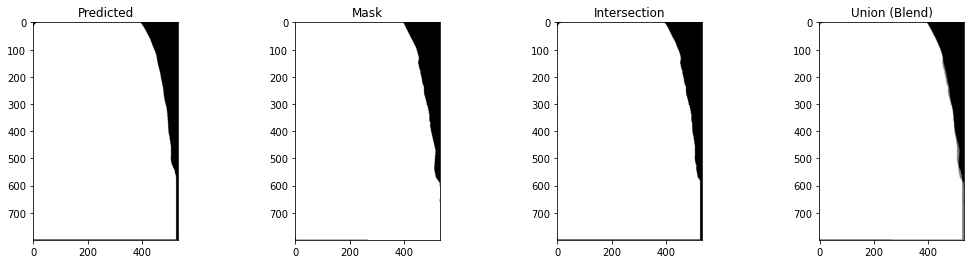

In [ ]:
# Display the images with the best IoU
if best_iou_images:
    print("Melhor IoU:")
    plt.figure(figsize=(18, 4))
    # Showing just one example of the best IoU, as there is more than one
    i = 1
    prediction, mask, intersection, iou = best_iou_images[0]
    plt.subplot(1, 4, i)
    plt.imshow(prediction, cmap='gray')
    plt.title('Predicted')
    plt.subplot(1, 4, i + 1)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.subplot(1, 4, i + 2)
    plt.imshow(intersection, cmap='gray')
    plt.title('Intersection')
    plt.subplot(1, 4, i + 3)
    plt.imshow(cv2.addWeighted(prediction, 0.5, mask, 0.5, 0), cmap='gray')
    plt.title('Union (Blend)')

    plt.show()

Pior IoU:


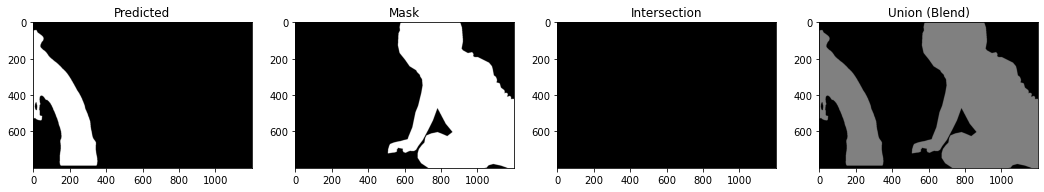

In [ ]:
# Display the images with the worst IoU
if worst_iou_images:
    print("Pior IoU:")
    plt.figure(figsize=(18, 4))
    # Showing just one example of the worst IoU, as there is more than one
    i = 1
    prediction, mask, intersection, iou = worst_iou_images[0]
    plt.subplot(1, 4, i)
    plt.imshow(prediction, cmap='gray')
    plt.title('Predicted')
    plt.subplot(1, 4, i + 1)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.subplot(1, 4, i + 2)
    plt.imshow(intersection, cmap='gray')
    plt.title('Intersection')
    plt.subplot(1, 4, i + 3)
    plt.imshow(cv2.addWeighted(prediction, 0.5, mask, 0.5, 0), cmap='gray')
    plt.title('Union (Blend)')

    plt.show()

In [ ]:
# Show performance metrics
average_iou = iou_sum / num_images
average_recall = total_true_positive / num_images
average_precision = total_true_positive / (total_true_positive + total_false_positive)
average_dice_coefficient = 2 * total_true_positive / (2 * total_true_positive + total_false_positive + total_false_negative)

print(f"Recall médio: {average_recall:.4f}")
print(f"Precision média: {average_precision:.4f}")
print(f"Dice Coefficient médio: {average_dice_coefficient:.4f}")

Recall médio: 0.9034
Precision média: 0.9624
Dice Coefficient médio: 0.9320


# 8. Performance



```
Average Recall: 0.9034
Recall measures the model's ability to capture all positive instances. A value of 0.9034 means that, on average, your model is able to correctly identify around 90.34% of the real areas (masks) in the images.

Average Precision: 0.9624
Measures the accuracy of the positive predictions made by the model. A value of 0.9624 indicates that, on average, around 96.24% of the areas predicted by the model actually correspond to the real areas.

Average Dice Coefficient: 0.9320
The Dice Coefficient is a metric that combines Recall and Precision, providing a general measure of overlap between predicted and actual areas. A value of 0.9320 means that, on average, there is good agreement (around 93.20%) between the areas segmented by the model and the actual areas.
```





# 9. Improvements:


Among various attempts to improve the average IoU, we remember the image transformation techniques we learned during the course.
One of these was closing, as we visualized some noisy images, specifically some masks resulting from Yolo segmentation.
So for these we applied this transformation, just once.

In [ ]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
def calculate_iou(prediction, mask):
    intersection = np.logical_and(prediction, mask)
    union = np.logical_or(prediction, mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou

# Closing
def apply_closing(image, kernel_size=(5, 5)):
    kernel = np.ones(kernel_size, np.uint8)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    return closing

In [ ]:
predicted_folder = r"C:\Users\Rafinha Linda\Downloads\mask_yolo"
masks_folder = r"C:\Users\Rafinha Linda\Downloads\masks"

In [ ]:
def calculate_metrics(prediction, mask):
    true_positive = np.sum(np.logical_and(prediction, mask))
    false_positive = np.sum(np.logical_and(prediction, np.logical_not(mask)))
    false_negative = np.sum(np.logical_and(np.logical_not(prediction), mask))

    recall = true_positive / (true_positive + false_negative + 1e-8)
    precision = true_positive / (true_positive + false_positive + 1e-8)
    dice_coefficient = 2 * true_positive / (2 * true_positive + false_positive + false_negative + 1e-8)

    return recall, precision, dice_coefficient


In [ ]:
# Initialize variables for the best and worst IoU
best_iou = 0.0
worst_iou = 1.0
iou_sum = 0.0
num_images = 0

# Variables for general model metrics
total_true_positive = 0
total_false_positive = 0
total_false_negative = 0

# Iterate over the files in the predicted folder
for predicted_image_path in Path(predicted_folder).glob("*.png"):
    predicted_image = cv2.imread(str(predicted_image_path), cv2.IMREAD_COLOR)
    predicted_image_closed = apply_closing(predicted_image)
    predicted_image_closed_gray = cv2.cvtColor(predicted_image_closed, cv2.COLOR_BGR2GRAY)

    # Get the path of the corresponding mask file
    mask_path = Path(masks_folder) / predicted_image_path.name
    assert mask_path.exists(), f'A máscara correspondente para {predicted_image_path.name} não existe.'

    # Loading the mask
    mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)

    # Calculating the IoU
    iou = calculate_iou(predicted_image_closed_gray, mask)

    # Calcular métricas de desempenho
    recall, precision, dice_coefficient = calculate_metrics(predicted_image_closed_gray, mask)

    #  Update best and worst IoU and associated information
    if iou > best_iou:
        best_iou = iou
        best_iou_image_path = predicted_image_path
        best_iou_mask = mask
        best_iou_prediction_closed = predicted_image_closed
    elif iou < worst_iou:
        worst_iou = iou
        worst_iou_image_path = predicted_image_path
        worst_iou_mask = mask
        worst_iou_prediction_closed = predicted_image_closed

    # Update general model metrics
    total_true_positive += recall
    total_false_positive += precision - recall
    total_false_negative += 1 - recall

    iou_sum += iou
    num_images += 1

# Calculate general model metrics
average_iou = iou_sum / num_images
average_recall = total_true_positive / num_images
average_precision = total_true_positive / (total_true_positive + total_false_positive)
average_dice_coefficient = 2 * total_true_positive / (2 * total_true_positive + total_false_positive + total_false_negative)

# View statistics
print(f"Número total de imagens: {num_images}")
print(f"IoU médio: {average_iou:.4f}")
print(f"Melhor IoU: {best_iou:.4f}")
print(f"Pior IoU: {worst_iou:.4f}")
print(f"Recall médio: {average_recall:.4f}")
print(f"Precision média: {average_precision:.4f}")
print(f"Dice Coefficient médio: {average_dice_coefficient:.4f}")


Número total de imagens: 2631
IoU médio: 0.8666
Melhor IoU: 0.9918
Pior IoU: 0.0000
Recall médio: 0.9038
Precision média: 0.9629
Dice Coefficient médio: 0.9324


## 9.1. Output:

```
The average IoU rose slightly (around 0.003). This translates into a slight improvement.
The best IoU has improved a lot: 0.9918.
The worst IoU remained at 0.000, which was to be expected since the problem with this image is not noise but yolo segmentation.
And then we put the performance metrics together, so it's easier to compare against the values above.
We can only point out that there has been a general improvement in all the measures, but nothing very significant.
```



## 9.2. Visualization

Pior IoU:


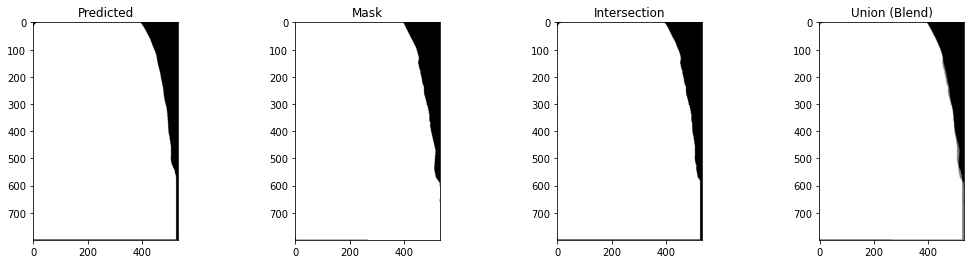

In [ ]:
# Display the images with the best IoU
if best_iou_images:
    print("Melhor IoU:")
    plt.figure(figsize=(18, 4))
    # Showing just one example of the best IoU, as there is more than one
    i = 1
    prediction, mask, intersection, iou = best_iou_images[0]
    plt.subplot(1, 4, i)
    plt.imshow(prediction, cmap='gray')
    plt.title('Predicted')
    plt.subplot(1, 4, i + 1)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.subplot(1, 4, i + 2)
    plt.imshow(intersection, cmap='gray')
    plt.title('Intersection')
    plt.subplot(1, 4, i + 3)
    plt.imshow(cv2.addWeighted(prediction, 0.5, mask, 0.5, 0), cmap='gray')
    plt.title('Union (Blend)')

    plt.show()

Pior IoU:


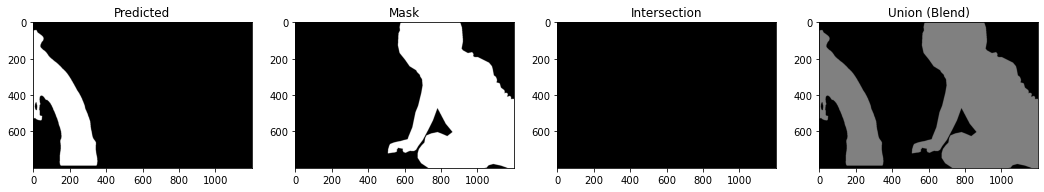

In [ ]:
# Display the images with the worst IoU
if worst_iou_images:
    print("Pior IoU:")
    plt.figure(figsize=(18, 4))
    # Showing just one example of the worst IoU, as there is more than one
    i = 1
    prediction, mask, intersection, iou = worst_iou_images[0]
    plt.subplot(1, 4, i)
    plt.imshow(prediction, cmap='gray')
    plt.title('Predicted')
    plt.subplot(1, 4, i + 1)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.subplot(1, 4, i + 2)
    plt.imshow(intersection, cmap='gray')
    plt.title('Intersection')
    plt.subplot(1, 4, i + 3)
    plt.imshow(cv2.addWeighted(prediction, 0.5, mask, 0.5, 0), cmap='gray')
    plt.title('Union (Blend)')

    plt.show()

Unsurprisingly, the same images with better and worse IoU.


# 10. General conclusion:
```

Although there are some things that could have been explored more, for example, try to improve the performance of the model in the images it didn't have success, in overall the Yolov8 model performed better than expected and the results didn't disappoint. 

Yolov8 is a very simple and straightforward model and could be used in many real world situations.
```

